In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt

from mxnet import nd, autograd
from mxnet import gluon, init


In [21]:
n_train = 100
n_test = 100
w_true = [1.2, -3.4, 5.6] 
b_true = 5

# y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + epsilon
X_data_single = nd.random.normal(0, 1, (n_train + n_test, 1))
X_data = nd.concat(
    X_data_single, 
    nd.power(X_data_single, 2), 
    nd.power(X_data_single, 3)
)
y_data = w_true[0] * X_data[:, 0] \
    + w_true[1] * X_data[:, 1] \
    + w_true[2] * X_data[:, 2] \
    + b_true
y_data += nd.random.normal(0, 0.01, y_data.shape)

print(X_data.shape, y_data.shape)

(200, 3) (200,)


epoch 100: train loss=0.000414571026340127, test loss=0.0006153404247015715


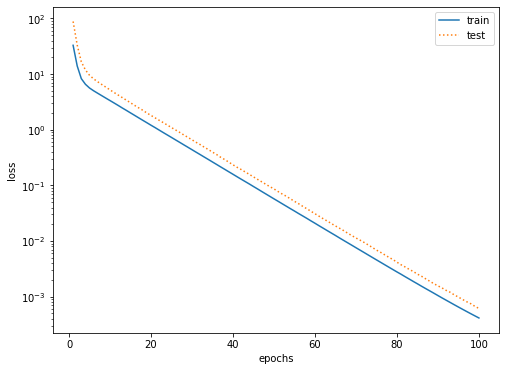

weight: [[ 1.2073807 -3.3795223  5.597585 ]] 
bias: [4.967423]


In [26]:
def semilogy(
    x_vals, y_vals, 
    x_label, y_label, 
    x2_vals=None, y2_vals=None, 
    legend=None, figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()
    return 

num_epochs = 100
loss = gluon.loss.L2Loss()

def fit_and_plot(X_train, X_test, y_train, y_test):
    net = gluon.nn.Sequential()
    net.add(gluon.nn.Dense(1))
    net.initialize()
    batch_size = min(10, y_train.shape[0])
    train_iter = gluon.data.DataLoader(
        gluon.data.ArrayDataset(X_train, y_train), 
        batch_size, 
        shuffle=True
    )
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for ep in range(1, num_epochs+1):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        l1 = loss(net(X_train), y_train).mean().asscalar()
        l2 = loss(net(X_test), y_test).mean().asscalar()
        train_ls.append(l1)
        test_ls.append(l2)
    print('epoch {}: train loss={}, test loss={}'.format(ep, l1, l2))
    semilogy(
        range(1, num_epochs+1), train_ls, 'epochs', 'loss', 
        range(1, num_epochs+1), test_ls,
        ['train', 'test'], 
        figsize=(8, 6)
    )
    print('weight:', net[0].weight.data().asnumpy(), '\nbias:', net[0].bias.data().asnumpy())
    return 

fit_and_plot(X_data[:n_train, :], X_data[n_train:, :], y_data[:n_train], y_data[n_train:])
# fit_and_plot(X_data_single[:n_train, :], X_data_single[n_train:, :], y_data[:n_train], y_data[n_train:])
# fit_and_plot(X_data[0:2, :], X_data[n_train:, :], y_data[0:2], y_data[n_train:])